In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [56]:
# Load the data
df = pd.read_csv(r'C:\Users\hp\Downloads\Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [57]:
df.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [58]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [59]:
print(df.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [60]:
# Drop Prospect ID and Lead Number columns
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [61]:
# Impute missing values for numerical columns
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)


In [62]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [63]:
# Convert 'Do Not Email' and 'Do Not Call' to 0s and 1s
df['Do Not Email'] = df['Do Not Email'].map({'No': 0, 'Yes': 1})
df['Do Not Call'] = df['Do Not Call'].map({'No': 0, 'Yes': 1})

In [64]:
# Drop columns with more than 3000 missing values
missing_threshold = 3000
df = df.dropna(thresh=len(df) - missing_threshold, axis=1)

In [65]:
# Get the list of categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [66]:
# Create dummy variables for categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [67]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [71]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [73]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:

# Calculate Lead Scores
lead_scores = model.predict_proba(X_test_scaled)[:, 1] * 100

In [76]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lead_scores)
roc_auc = roc_auc_score(y_test, lead_scores)

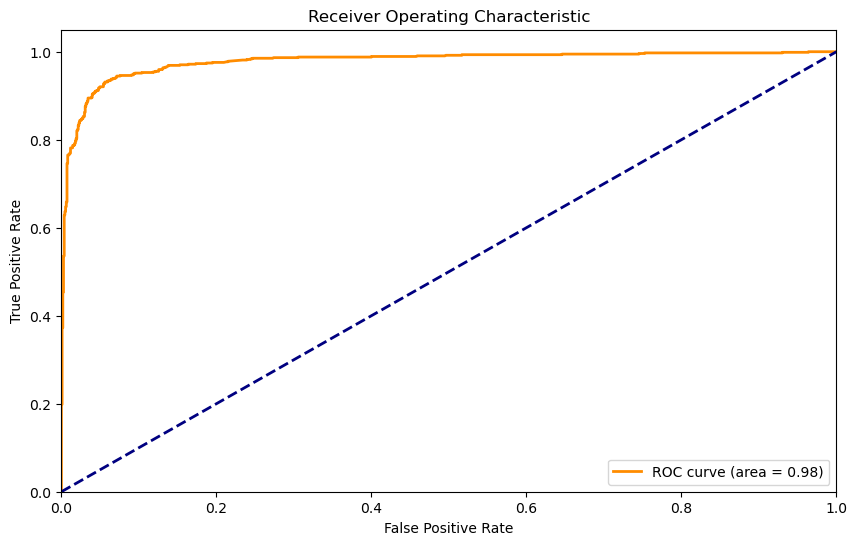

In [77]:
# Create ROC curve plot
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [79]:
# Export the lead scores to Excel
lead_scores_df = pd.DataFrame({'Prospect_ID': X_test.index, 'Lead_Score': lead_scores, 'Converted': y_test})
lead_scores_df.to_excel(r'C:\Users\hp\Downloads\lead_scores.xlsx', index=False)

In [80]:
# Get the coefficients from the trained model
coefficients = model.coef_[0]

In [81]:
# Create a DataFrame to associate coefficients with feature names
coef_df = pd.DataFrame({'Feature': X_imputed.columns, 'Coefficient': coefficients})

In [82]:
# Sort the coefficients in descending order to identify top variables
top_variables = coef_df.sort_values(by='Coefficient', ascending=False).head(3)


In [83]:
print("Top three variables contributing most towards conversion probability:")
print(top_variables)

Top three variables contributing most towards conversion probability:
                                     Feature  Coefficient
88  Tags_Will revert after reading the email     1.571615
3                Total Time Spent on Website     1.084354
71                   Tags_Closed by Horizzon     1.057205


In [84]:
# Create a dictionary to map coefficients to feature names
coef_dict = {}
for coef, feat in zip(coefficients, X_imputed.columns):
    coef_dict[feat] = coef

In [85]:
# Sort the coefficients in descending order of magnitude
sorted_coefs = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)


In [86]:
# Get the top 3 categorical/dummy variables
top_categorical_vars = [feat for feat, coef in sorted_coefs[:3]]

In [88]:
print("Top 3 categorical/dummy variables:")
print(top_categorical_vars)

Top 3 categorical/dummy variables:
['Tags_Ringing', 'Tags_Will revert after reading the email', 'Total Time Spent on Website']
